# Linear Regression Models in R

## 1.  Merge our separate data files into one data frame.

Our working directory should be set to the same location as our notebook  file. 

In [4]:
setwd(homeDir)
homeDir <- getwd()
homeDir

[1] "/Users/John/Box Sync/Courses/Teaching - Summer 2019"

In that directory everyone should now have a subdirectry with the gamedata named "FWData." Within this directory, we will make a list of everyone's files and name it **fileNames**.

In [5]:
setwd("FWData")
fileNames <- list.files(pattern = "txt$")
fileNames

[1] "DSC-1_Computer.txt" "JAB-1_Computer.txt" "kap-1_Computer.txt"
 [4] "kap-2_Computer.txt" "kap-3_Computer.txt" "MIL-1_Computer.txt"
 [7] "QOW-1_Computer.txt" "RBP-1_Computer.txt" "UOS-1_Computer.txt"
[10] "UOS-2_Computer.txt"

We can loop through fileNames, reading each one into our environment and concatenating them together. 

(The game produces .txt files in which values are delimited by commas, not tabs, so we use the read.csv() function.

In [6]:
for (f in 1:length(fileNames)) {        # for every number 1 through the total # of files
  if (f == 1) {                         # Check if it is the first file in the list
    fwDat <- read.csv(fileNames[f])     # if so read in the data and name it "fwDat".
  } else {                              # Or else, if this is not the first file in the list,
    tempdf <- read.csv(fileNames[f])    # then read the next file in as a temporary df
    fwDat <- rbind(fwDat, tempdf)       # and bind the rows of the temporary df to fwDat.
    rm(tempdf)                          # Clear out the tempdf 
  }
}
rm(f, fileNames)

Let's take a look at the variables in our data. 

Dependent/Outcome Variables
 - **Responsetime**:  The primary outcome variable (DV) we will focus on is **Responsetime**, measuring the time (in seconds) from when the cards flip over to when players initates their responses.
 - **Isresponsecorrect**:  We could also explore accuracy as an outcome variable. **Isresponsecorrect** indicates accuracy as correct or incorrect. Details about whether the correct response was to swipe left, right, or declare war, and which of these respones the player made, are noted in **Correctresponse** and **Response** respectively.

Independent/Predictor Variables
 - *Numerical Distance??*: Numerical distance is defined as the difference between the numerical magnitudes being compared. We don't currently have a numerical distance variable in our data frame, but we do have the variables **Player1HandValue** and **Player2HandValue**, which provide the necessary information to caluclate the numerical distance.
 - **CardType**: To test the effect of number format on numerical processing, we can use **Player1Numeratorcardtype** (note the values in this variable are the same for Player2 and denominators).
 
 There are many other variables that may be important for explaining differences in performance beyond numerical distance and card type. Do you have any predictions about which other variables or attributes of the pairs might explain the data or help us understand the distance and notation effects?
 

In [7]:
str(fwDat)

'data.frame':	679 obs. of  25 variables:
 $ Round                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Responder                 : Factor w/ 2 levels "player1","player2": 1 2 1 1 1 1 1 1 1 1 ...
 $ Response                  : Factor w/ 3 levels "swipeLeft","swipeRight",..: 2 1 2 3 2 1 2 1 1 2 ...
 $ Correctresponse           : Factor w/ 3 levels "declareWar","swipeLeft",..: 3 2 2 2 3 2 3 1 3 1 ...
 $ Isresponsecorrect         : Factor w/ 2 levels "correct","incorrect": 1 1 2 2 1 1 1 2 2 2 ...
 $ Responsetime              : num  3.63 4.96 3.09 1.94 1.69 1.57 2.28 1.47 4.28 1.19 ...
 $ Responsetimestamp         : num  10 24.8 35.8 42.8 48.6 ...
 $ Player1Id                 : Factor w/ 10 levels "DSC-1","JAB-1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Player1Points             : int  1 1 1 1 2 3 4 4 4 4 ...
 $ Player1Numeratorrank      : num  1 9 3 6 1 2 3 4 4 5 ...
 $ Player1Numeratorsuit      : Factor w/ 4 levels "clubs","diamonds",..: 2 2 2 3 3 1 2 3 2 2 ...
 $ Player1Numeratorcardtype  : Fact

# 2. Data Preparation

Create the variable **absDist** to store the absolute numerical distances between the two fractions in each hand.
Then examine which distances were presented in the game.

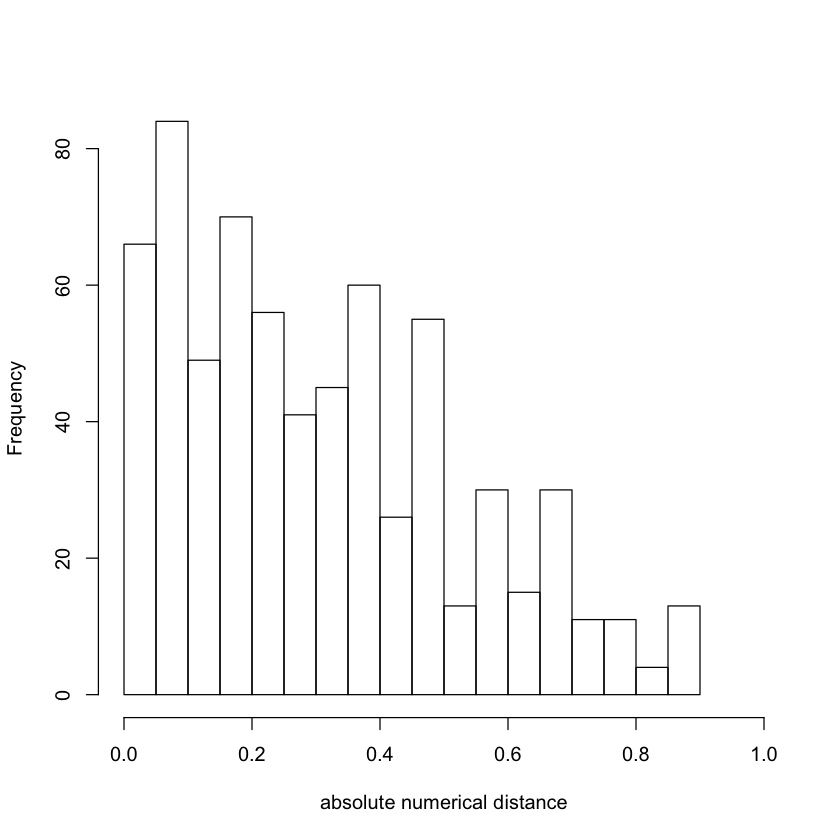

In [9]:
fwDat$absDist <- abs((fwDat$Player1Numeratorrank/fwDat$Player1Denominatorrank)      # you could also use "handvalue"
                     - (fwDat$Player2Numeratorrank/fwDat$Player2Denominatorrank))   # this is more precise
# observe the distrobution of distances presented in the game
hist(fwDat$absDist, 
     n = 20, xlab = "absolute numerical distance", main = "", xlim = c(0,1))

Add new versions of variables to our data frame from the given data to optomize their values for our analysis.
 - **rt** to replace Responsetime
 - **err** to indicate erroneous responses instead of "Isresponsecorrect
 - **type** to replace our 4 cardType variables
 
For plotting purposes later, lets save a few global variables.
 - **cardTypes**: a list of our 3 card types
 - **cardTypeCol**: a list of colors to keep 
 - **cardTypeSymb**: a list of shapes to plot different points for each card type

In [10]:
fwDat$rt <- fwDat$Responsetime 
#fwDat$Responsetime <- NULL        # destroy the old if you like things tidy

fwDat$err <- ifelse(fwDat$Isresponsecorrect == "correct", 0, 1)
#fwDat$Isresponsecorrect <- NULL   # destroy the old if you like things tidy

fwDat$type <- ifelse(fwDat$Player1Denominatorcardtype=="r", "traditional",
                         ifelse(fwDat$Player1Denominatorcardtype=="n", "numerals",
                                "pips-only"))
fwDat$type <- as.factor(fwDat$type)

# plotting variables
cardTypes <- levels(fwDat$type)# nonsymb, numerals, traditional
cardTypeCols <- c("blue", "red", "grey35")
cardTypeSymb <- c(22,23,24)


fwDat$id <- substring(fwDat$Player1Id, 1,3)

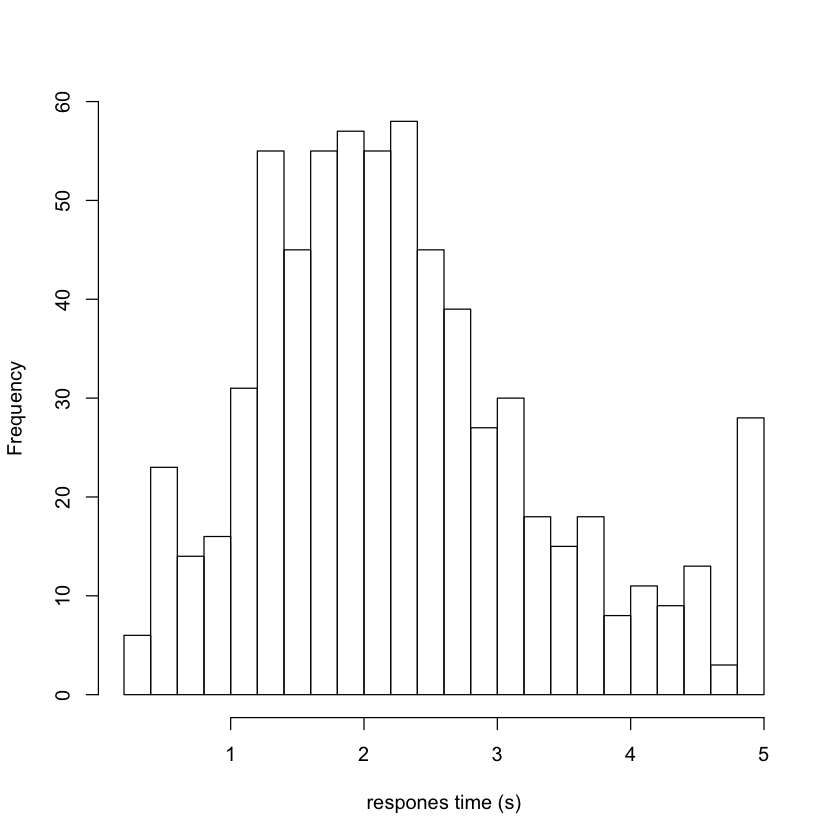

In [12]:
hist(fwDat$rt,
    n = 20, xlab = "respones time (s)", main = "")

# 3. Visualize the data

In studies measuring response time, we use this measure to quantify how much  *processing time* or the amount of *cognitive processing* necessary to complete a task. Therefore, it is common practice to only analyze resposne times from accurate judgements. The assumption is that correct response offer a more valid measure of the processing necessary to *do* something, whereas error responses are an instance were accurate magnitude processing did not occur.

Create a clean data frame and plot the bivariate relationship between response time and numerical distance.

In [13]:
df <- fwDat[fwDat$Responder=="player1",]        # only hands where the player made a response before the Computer
df <- df[df$Correctresponse!="declareWar",]     # only hands where a comparison should be made (not declare war)
df <- df[df$Isresponsecorrect=="correct",]      # only correct responses
# you could filter this in one line by connecting the conditional statements with "&" inside the brackets.

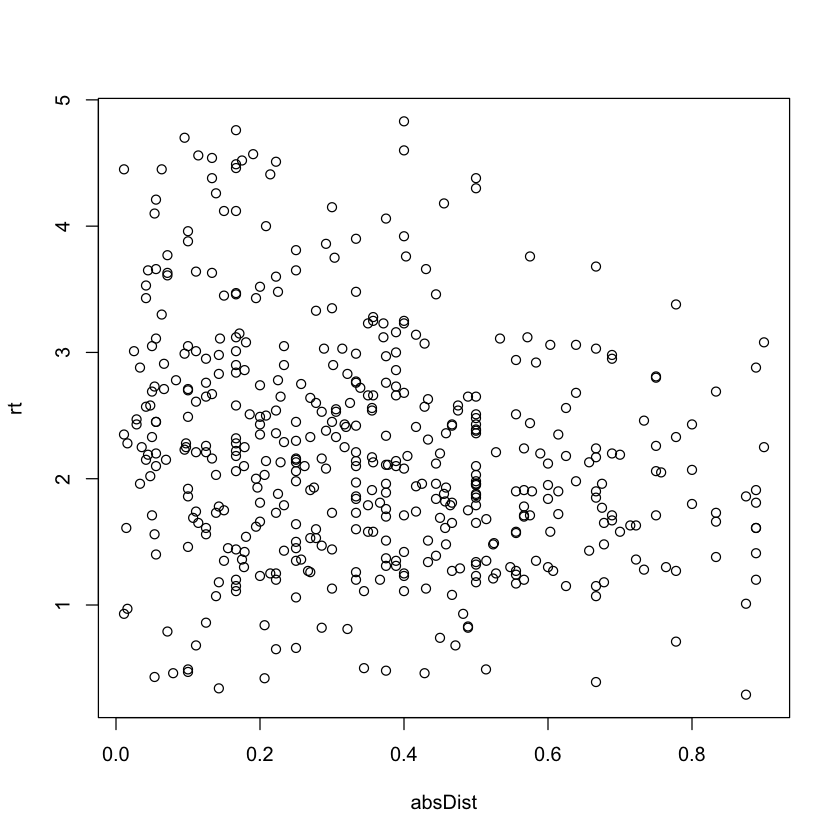

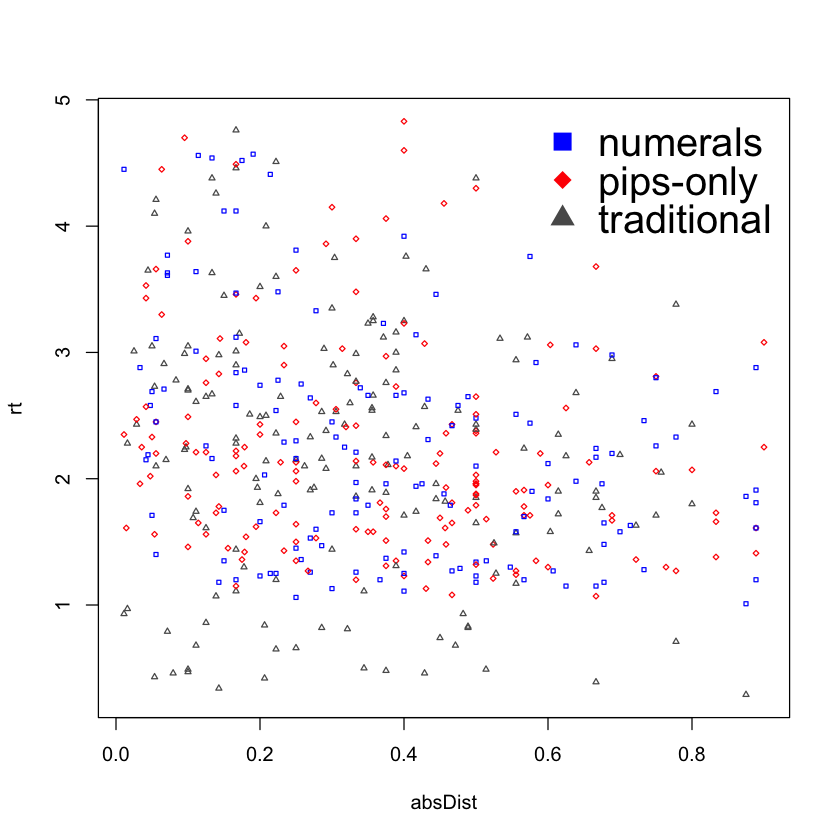

In [14]:
# Observing the RTs of all responses over the distrobution of numerical distances
# A simple colorless plot is less informative.
with(df,
    plot(rt ~ absDist))

# If we color the points we can better observe what is going on and whether 
#   there may be a linear relationship
with(df,
    plot(rt ~ absDist,
        pch = cardTypeSymb[type], cex = .5, col = cardTypeCols[type]))
legend("topright", legend = levels(as.factor(df$type)), 
       cex = 2, panel.points(lwd = 2), pch = c(15,18,17), col = cardTypeCols, bg = cardTypeCols,
       bty = "n", text.font = 1, y.intersp = .8 )

# 4. Linear Regression with Categorical Predictors

Lets first ask the question, are there differences in response time when people play with different card types? 

One way to approach this question is to test whether the mean RT in each condition is different from one another. The null hypothesis would be that there is not difference in mean RTs across conitions.

In [15]:
typeMeans <- with(df,
                  tapply(rt, type, mean))  # create a table of mean RTs across levels of card type
print(typeMeans)

   numerals   pips-only traditional 
   2.253901    2.230915    2.200357 


You could test whether these means are different from another by performing a series of paired t-tests, but this is a class on linear regression, modeling the difference between our categorical predictors of card type is actually a lot easier.

In [16]:
type.mod <- lm(rt ~ type, data = df)
summary(type.mod)


Call:
lm(formula = rt ~ type, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9104 -0.6439 -0.1004  0.5261  2.5991 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.25390    0.07760  29.045   <2e-16 ***
typepips-only   -0.02299    0.10583  -0.217    0.828    
typetraditional -0.05354    0.10524  -0.509    0.611    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9215 on 470 degrees of freedom
Multiple R-squared:  0.0005605,	Adjusted R-squared:  -0.003692 
F-statistic: 0.1318 on 2 and 470 DF,  p-value: 0.8766


In [23]:
type.aov <- aov(rt ~ type, data = df)
summary(type.aov)

             Df Sum Sq Mean Sq F value Pr(>F)
type          2    0.2  0.1119   0.132  0.877
Residuals   470  399.1  0.8491               

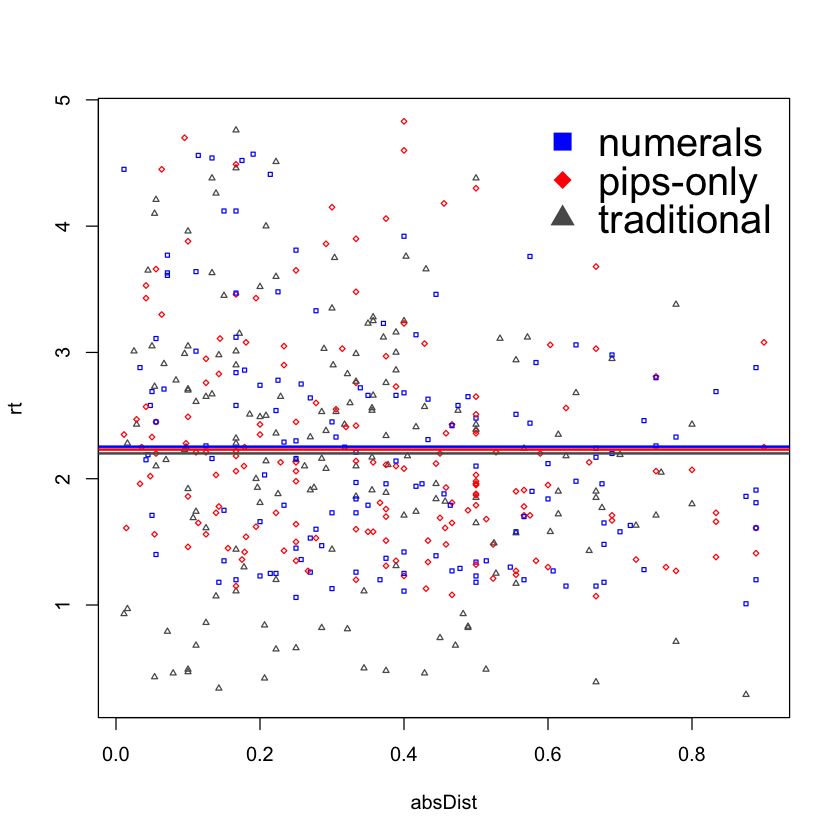

In [17]:
with(df,
    plot(rt ~ absDist,
        pch = cardTypeSymb[type], cex = .5, col = cardTypeCols[type]))
legend("topright", legend = levels(as.factor(df$type)), 
       cex = 2, panel.points(lwd = 2), pch = c(15,18,17), col = cardTypeCols, bg = cardTypeCols,
       bty = "n", text.font = 1, y.intersp = .8 )
abline(h = type.mod$coef[1], col = "blue", lwd = 2)
abline(h = type.mod$coef[1] + type.mod$coef[2], col = "red", lwd = 2)
abline(h = type.mod$coef[1] + type.mod$coef[3], col = "gray35", lwd = 2)

# 5. Linear regression with continuous and categorical predictors.

Next lets ask the questions, (1) Do we see distance effects in our game data? and (2) What do these distance effects look like in each condition.

In [18]:
dist.type.mod <- lm(rt ~ type + absDist, data = df) # evaluating the relationship between dist & RT, and 
summary(dist.type.mod)                              #  card type & RT, without testing for an interaction.


Call:
lm(formula = rt ~ type + absDist, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0387 -0.6432 -0.1068  0.4929  2.6343 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.63977    0.10519  25.096  < 2e-16 ***
typepips-only   -0.04478    0.10302  -0.435    0.664    
typetraditional -0.11850    0.10311  -1.149    0.251    
absDist         -0.99819    0.18951  -5.267 2.11e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8963 on 469 degrees of freedom
Multiple R-squared:  0.05638,	Adjusted R-squared:  0.05035 
F-statistic: 9.341 on 3 and 469 DF,  p-value: 5.226e-06


## This model is very similar to the last, but now we have a coefficient estimated for absDist in addition to our categorical coefficients for card type.  What can we notice?
 - What does our absDist coefficient tell us?
 - The (Intercept) coefficient is slightly higher than the previous model? Why would the estimated mean of RT for numeral cats be higher when we add a slope?
 - What do the two other categorial coefficients tell us?
 - If we look at the R-squared value of this model relative to the type-only model, what do we see?  Is this a better model?

In [24]:
# The the R-squared values from one model to the next may indicate that adding an additional predictor
#  (absDist) increased the amount of variation explained by the model. But is it a better model?
anova(type.mod, dist.type.mod)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
470,399.0771,NA,NA,NA,NA
469,376.7873,1,22.2898,27.74488,2.113274e-07


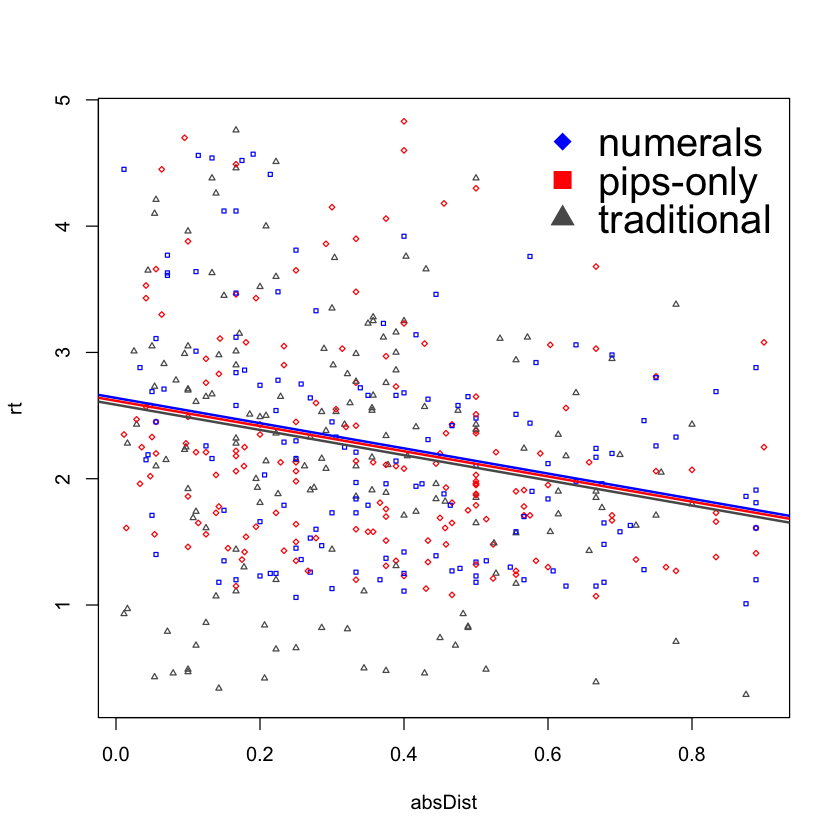

In [19]:
with(df,
    plot(rt ~ absDist,
        pch = cardTypeSymb[type], cex = .5, col = cardTypeCols[type]))
legend("topright", legend = levels(as.factor(df$type)), 
       cex = 2, panel.points(lwd = 2), pch = c(18,15,17), col = cardTypeCols, bg = cardTypeCols,
       bty = "n", text.font = 1, y.intersp = .8 )
abline(a = dist.type.mod$coef[1], b = dist.type.mod$coef[4], col = "blue", lwd = 2)
abline(a = (dist.type.mod$coef[1] + type.mod$coef[2]), b = dist.type.mod$coef[4], col = "red", lwd = 2)
abline(a = (dist.type.mod$coef[1] + type.mod$coef[3]), b = dist.type.mod$coef[4], col = "gray35", lwd = 2)

## Above we tested if distance effects were negative in gameplay data, but our model without the interaction between card type and distances assumes that each card type has the same distance effect slope. Is that true?

In [20]:
mean(df$absDist)

[1] 0.3558819

In [21]:
distXtype.mod <- lm(rt ~ type * absDist, data = df) 
summary(distXtype.mod)


Call:
lm(formula = rt ~ type * absDist, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0053 -0.6311 -0.1118  0.4943  2.6304 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.7499     0.1470  18.709  < 2e-16 ***
typepips-only            -0.1952     0.2000  -0.976    0.330    
typetraditional          -0.2886     0.1962  -1.471    0.142    
absDist                  -1.2832     0.3262  -3.934 9.61e-05 ***
typepips-only:absDist     0.3953     0.4558   0.867    0.386    
typetraditional:absDist   0.4715     0.4729   0.997    0.319    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8971 on 467 degrees of freedom
Multiple R-squared:  0.05876,	Adjusted R-squared:  0.04868 
F-statistic: 5.831 on 5 and 467 DF,  p-value: 3.079e-05


Adding the interaction gave us two new coefficient estimates, what do these estimates tell us?
Are there different idstance effect slopes for the different card types?

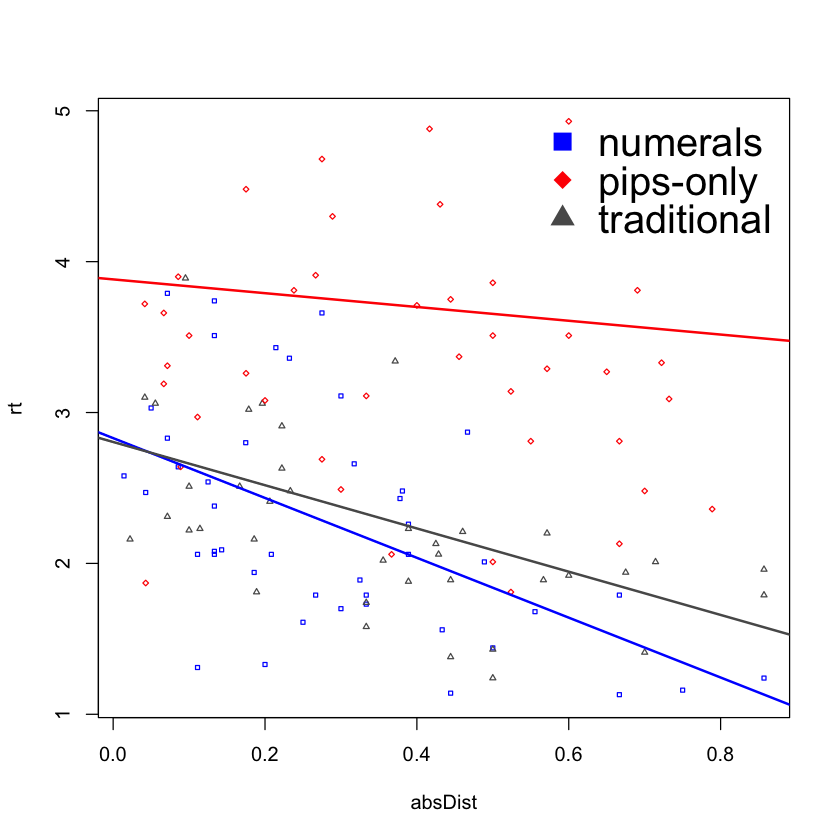

In [17]:
with(df,
    plot(rt ~ absDist,
        pch = cardTypeSymb[type], cex = .5, col = cardTypeCols[type]))
legend("topright", legend = levels(as.factor(df$type)), 
       cex = 2, panel.points(lwd = 2), pch = c(15,18,17), col = cardTypeCols, bg = cardTypeCols,
       bty = "n", text.font = 1, y.intersp = .8 )
abline(a = distXtype.mod$coef[1], 
       b = distXtype.mod$coef[4], col = "blue", lwd = 2)
abline(a = (distXtype.mod$coef[1] + type.mod$coef[2]), 
       b = distXtype.mod$coef[4] + distXtype.mod$coef[5], col = "red", lwd = 2)
abline(a = (distXtype.mod$coef[1] + type.mod$coef[3]), 
       b = distXtype.mod$coef[4] + distXtype.mod$coef[6], col = "gray35", lwd = 2)

In [25]:
library(afex)

Loading required package: lme4
Warning message:
“package ‘lme4’ was built under R version 3.5.2”Loading required package: Matrix
Loading required package: emmeans
NOTE: As of emmeans versions > 1.2.3,
      The 'cld' function will be deprecated in favor of 'CLD'.
      You may use 'cld' only if you have package:multcomp attached.
************
Welcome to afex. For support visit: http://afex.singmann.science/
- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'KR', 'S', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************

Attaching package: ‘afex’

The following object is masked from ‘package:lme4’:

    lmer



In [26]:
# set contrasts so that the intercept value = the mean RT estimate of LF and betas correspond to the other notations
#   relative to LF
afex::set_treatment_contrasts()


setting contr.treatment globally: options(contrasts=c('contr.treatment', 'contr.poly'))


In [20]:
mx.mod <- lmer(rt ~ absDist * type + (absDist*type|id), data = df)

ERROR: Error: grouping factors must have > 1 sampled level
